In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.time_base_seconds import TimeUnits
from src.odes import init_odes
from src.experiment import Experiment
from src.integrator import init_integrator, fsm
from src.tools import timer
import matplotlib.pyplot as plt
import numpy as np

## Experiment Variables

In [9]:
# Open window after t ~ N(mean, std) duration
Experiment.Variables.WINDOW_OPEN_NORMAL_MEAN = '02:00:00'   # HH:MM:SS
Experiment.Variables.WINDOW_OPEN_NORMAL_STD = '00:30:00'    # HH:MM:SS

# Close window afer t ~ (min, max) duration
Experiment.Variables.WINDOW_CLOSE_UNIFORM_LOW = '00:05:00'  # HH:MM:SS
Experiment.Variables.WINDOW_CLOSE_UNIFORM_HIGH = '00:10:00' # HH:MM:SS

# Set target temperatures (night, day)
Experiment.Variables.TEMP_NIGHT_NOMINAL = 15
Experiment.Variables.TEMP_DAY_NOMINAL = 22

# Set the radiator type
Experiment.Variables.RADIATOR_TYPE = 'water'  # 'water' or 'electric'

# Set experiment duration and integrator precision 
# Higher precision (lower value) takes longer to compute
Experiment.Variables.EXPERIMENT_DURATION = 2*TimeUnits.day
Experiment.Variables.INTEGRATOR_PRECISION = .01 

## Initialize Parts

In [10]:
init_odes()
init_integrator()

## Solver

In [11]:
with timer() as f:  # Takes about 2 minutes to finish...
    results = Experiment.integrator.solve(debug=False)

100%|██████████| 172800/172800 [01:22<00:00, 2096.94it/s]


duration: 83.05s


# Results

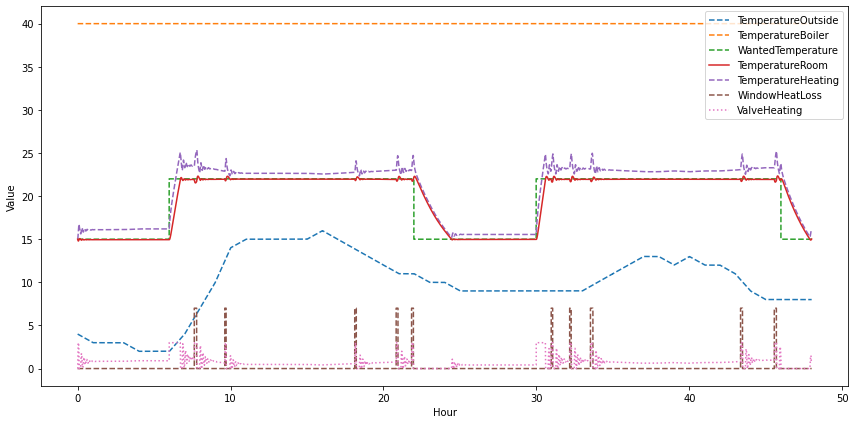

In [8]:
num = int(TimeUnits.hour) * 24
if results is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(results['t']/3600, results['env'], '--', label='TemperatureOutside')
    plt.plot(results['t']/3600, results['boiler'], '--', label='TemperatureBoiler')
    plt.plot(results['t']/3600, results['wanted'], '--', label='WantedTemperature')
    plt.plot(results['t']/3600, results['room'], '-', label='TemperatureRoom', zorder=10)
    plt.plot(results['t']/3600, results['radiator'], '--', label='TemperatureHeating')
    plt.plot(results['t']/3600, results['window'] * 7, '--', label='WindowHeatLoss')
    plt.plot(results['t']/3600, results['opening'] * 3, ':', label='ValveHeating')
    #plt.xlim(0, 24*2)
    #plt.xticks(range(0, 25*2, 2))
    plt.yticks(range(0, 45, 5))
    plt.xlabel("Hour")
    plt.ylabel("Value")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

In [12]:
import pandas as pd
pd.DataFrame(fsm.logs)

,t,source,dest,action
0,5.99,sleeping,active,"(sleeping, active)"
1,7.67,active,airing,"(active, airing)"
2,7.75,airing,active,"(airing, active)"
3,9.47,active,airing,"(active, airing)"
4,9.57,airing,active,"(airing, active)"
5,9.99,active,working,"(active, working)"
6,15.98,working,active,"(working, active)"
7,16.66,active,airing,"(active, airing)"
8,16.79,airing,active,"(airing, active)"
9,19.22,active,airing,"(active, airing)"


In [13]:
from itertools import zip_longest
keys, values = zip(*fsm.time_logs.items())
x = pd.DataFrame(list(zip_longest(*values)), columns=keys)
((x / TimeUnits.hour) % 24).iloc[100:150]

,airing,active
100,6.462986,2.536150
101,6.468810,1.780529
102,6.478126,2.408133
103,6.456426,1.938364
104,6.415710,2.436087
105,6.462374,1.822007
106,6.424952,2.270581
107,6.477614,1.921760
108,6.464292,2.358505
109,6.450855,2.122991


In [9]:
{k:((v['at']/TimeUnits.hour) % 24) for k, v in fsm.at_rand.items()}

{'airing': 22.07748789743161, 'active': 2.677163455848139}

# Format and export the results

In [10]:
data = [
    *zip(
        results['t']/3600,
        results['env'], 
        results['boiler'],
        results['wanted'],
        results['room'],
        results['radiator'],
        results['window']*7,
        results['opening']*3,
    )
]
with open('gnuplot/data.dat', 'w') as f:
    for _ in data:
        f.write(('{} '*len(_)).format(*_))
        f.write('\n')

# Gnuplot

In [11]:
!gnuplot gnuplot/script.gp

'gnuplot' is not recognized as an internal or external command,
operable program or batch file.
